Standard imports

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import missingno as msno

In [2]:
path = '/home/nyangweso/Desktop/Ds_1/Coronary-Heart-Disease-Predictor/Data/framingham.csv'

In [3]:
df = pd.read_csv(path)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<Axes: >

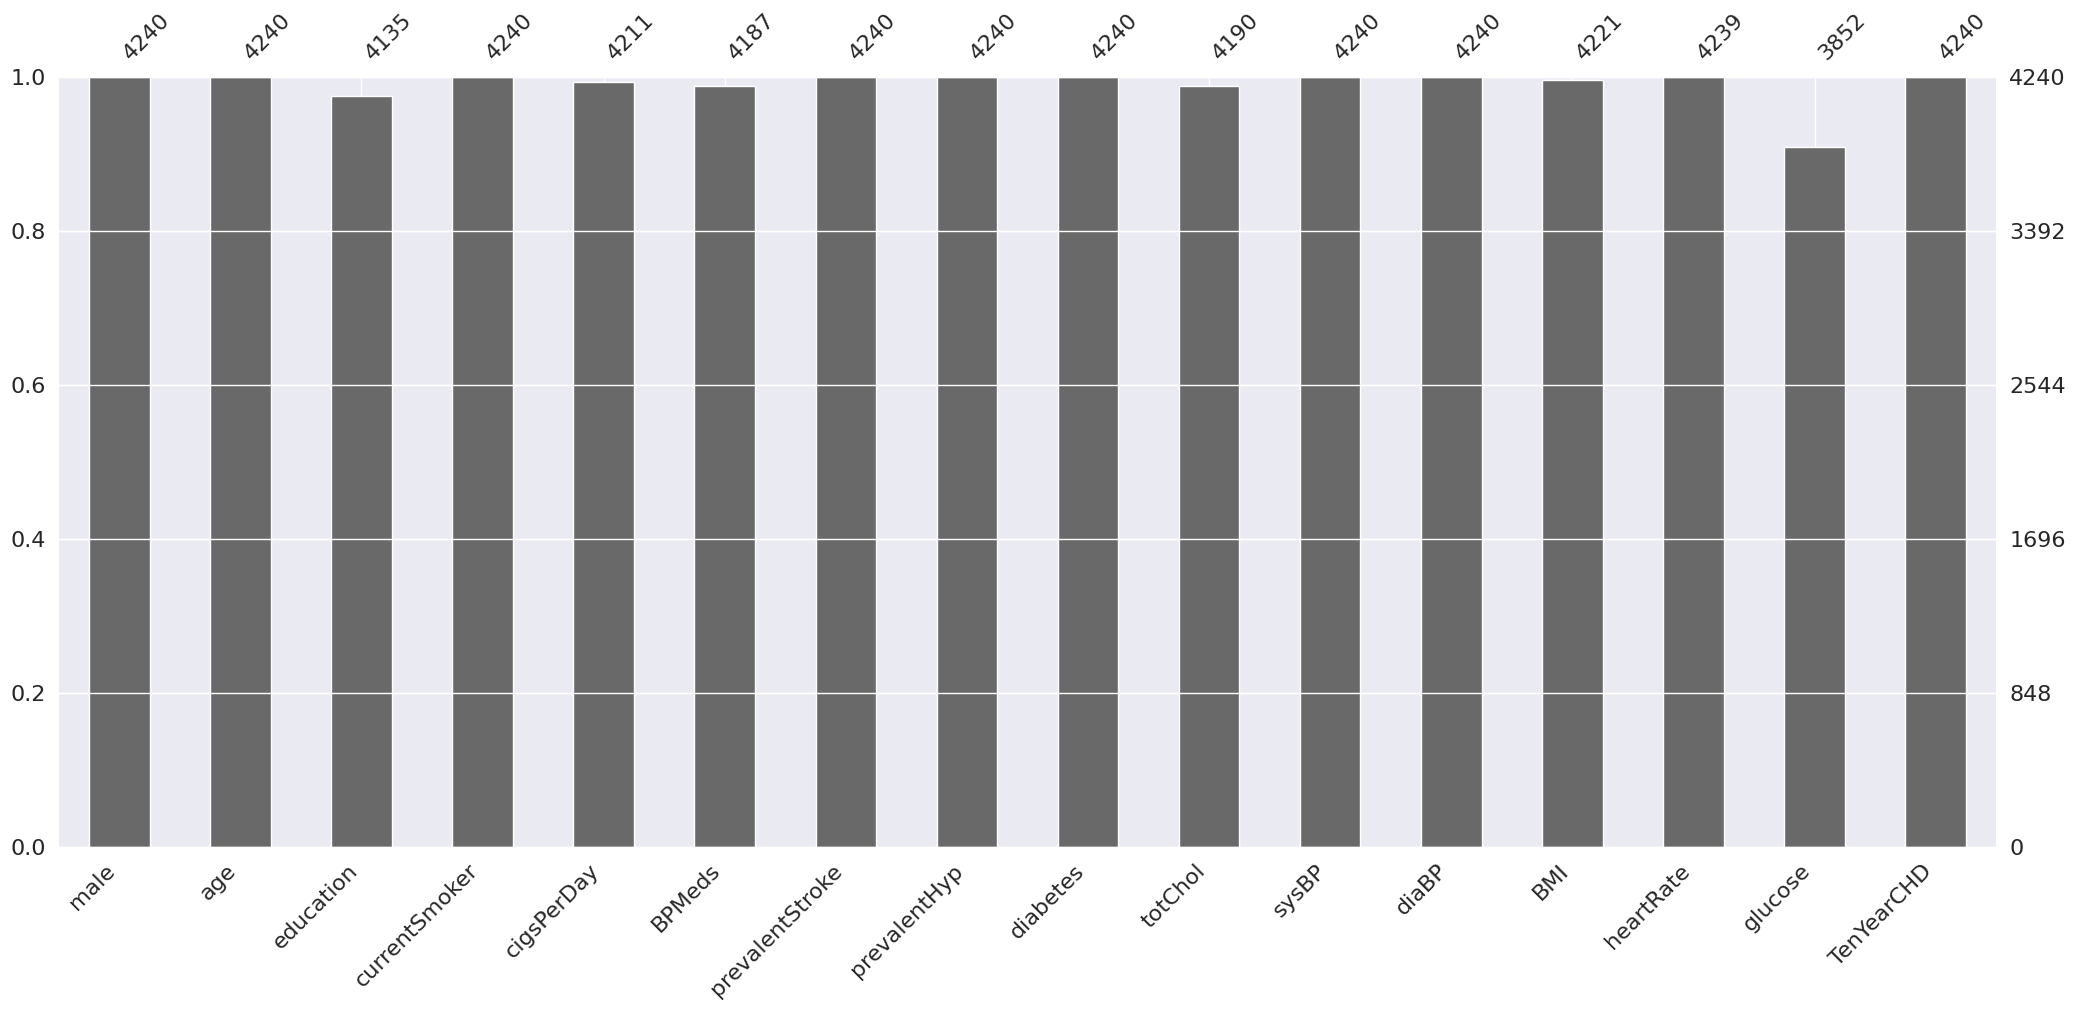

In [6]:
msno.bar(df)

In [7]:
data = pd.DataFrame((df.isna().mean() * 100).round(2), columns=['count_%'])
data

,count_%
male,0.00
age,0.00
education,2.48
currentSmoker,0.00
cigsPerDay,0.68
BPMeds,1.25
prevalentStroke,0.00
prevalentHyp,0.00
diabetes,0.00
totChol,1.18


In [8]:
df.loc[(df['currentSmoker']) & (df['cigsPerDay'].isna())]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


In [9]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
df['education'] = df['education'].fillna(0)

In [11]:
columns_to_drop = ['BPMeds', 'totChol', 'BMI', 'heartRate']

In [12]:
len(df[columns_to_drop].dropna()) / len(df)

0.9714622641509434

In [13]:
df.dropna(subset=columns_to_drop, inplace=True)

In [14]:
mean_of_cigsPerDay = df.loc[(
    df['cigsPerDay'] > 0)]['cigsPerDay'].mean().round()
mean_of_cigsPerDay

18.0

In [15]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(mean_of_cigsPerDay)

<Axes: >

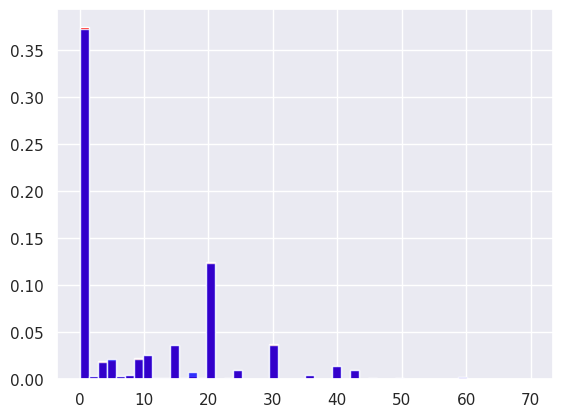

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
pd.read_csv(path)['cigsPerDay'].hist(bins=50, ax=ax, density=True, color='red')
df['cigsPerDay'].hist(
    bins=50, ax=ax, density=True, color='blue', alpha=0.8)

In [17]:
df['glucose'] = df['glucose'].fillna(
    df['glucose'].mean(numeric_only=True).round())

<Axes: >

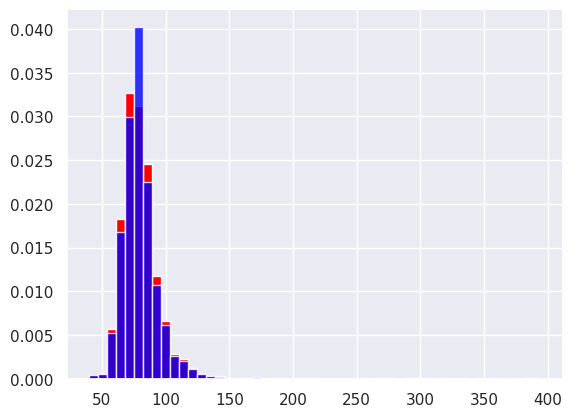

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

pd.read_csv(path)['glucose'].hist(bins=50, ax=ax, density=True, color='red')
df['glucose'].hist(
    bins=50, ax=ax, density=True, color='blue', alpha=0.8)

<Axes: ylabel='Density'>

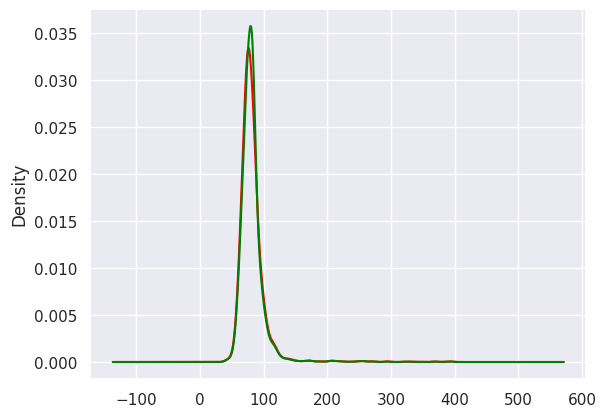

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

pd.read_csv(path)['glucose'].plot(kind='kde', ax=ax, color='red')
df['glucose'].plot(kind='kde', ax=ax, color='green')

In [20]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024637,0.007731,0.197947,0.320109,-0.050103,-0.003838,0.007004,0.014840,-0.067838,-0.035260,0.057388,0.080253,-0.115785,0.004588,0.095364
age,-0.024637,1.000000,-0.158350,-0.213851,-0.189837,0.125256,0.044136,0.302707,0.104704,0.263531,0.388902,0.202926,0.134271,-0.010356,0.114947,0.226012
education,0.007731,-0.158350,1.000000,0.020176,0.010208,-0.009570,-0.023798,-0.074817,-0.033850,-0.023642,-0.119568,-0.062051,-0.139146,-0.048285,-0.031928,-0.051170
currentSmoker,0.197947,-0.213851,0.020176,1.000000,0.771127,-0.049827,-0.032404,-0.103135,-0.044437,-0.046879,-0.129219,-0.106598,-0.169181,0.058247,-0.050554,0.023596
cigsPerDay,0.320109,-0.189837,0.010208,0.771127,1.000000,-0.044792,-0.033688,-0.063963,-0.039178,-0.025753,-0.085386,-0.050266,-0.090413,0.071958,-0.051928,0.061480
BPMeds,-0.050103,0.125256,-0.009570,-0.049827,-0.044792,1.000000,0.125943,0.259158,0.054935,0.081793,0.257925,0.194576,0.102221,0.013632,0.050837,0.085747
prevalentStroke,-0.003838,0.044136,-0.023798,-0.032404,-0.033688,0.125943,1.000000,0.066372,0.009438,0.007589,0.054388,0.048412,0.030487,-0.011786,0.015319,0.044228
prevalentHyp,0.007004,0.302707,-0.074817,-0.103135,-0.063963,0.259158,0.066372,1.000000,0.076651,0.162424,0.694564,0.615424,0.305276,0.147974,0.081119,0.173775
diabetes,0.014840,0.104704,-0.033850,-0.044437,-0.039178,0.054935,0.009438,0.076651,1.000000,0.043450,0.102408,0.051848,0.086506,0.053544,0.608450,0.089233
totChol,-0.067838,0.263531,-0.023642,-0.046879,-0.025753,0.081793,0.007589,0.162424,0.043450,1.000000,0.211224,0.167180,0.121241,0.092062,0.045072,0.079842


<Axes: >

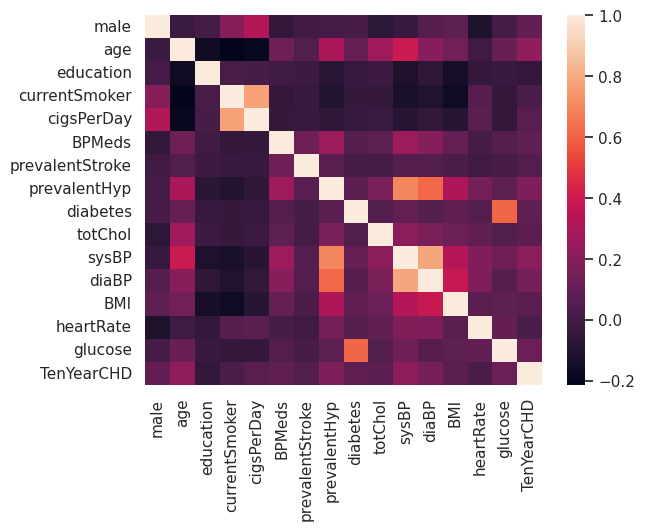

In [21]:
sns.heatmap(df.corr())

In [22]:
df.drop(["education"], axis=1, inplace=True)

In [23]:
df.shape

(4119, 15)

In [24]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3506
1     613
Name: count, dtype: int64

In [25]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [27]:
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

In [28]:
y.value_counts()

TenYearCHD
0    3506
1    3506
Name: count, dtype: int64

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4908, 14), (2104, 14), (4908,), (2104,))

In [30]:
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)

In [31]:
standard = StandardScaler()
xtrain = standard.fit_transform(xtrain)
xtest = standard.fit_transform(xtest)

In [34]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(xtrain, ytrain.values.ravel())
ypred_rf = rf.predict(xtest)
rf_model = accuracy_score(ytest, ypred_rf)
ypred_rf2 = rf.predict(xtrain)
rf_model2 = accuracy_score(ytrain, ypred_rf2)
print(
    f"accuracy for test set :{rf_model:.2f}\naccuracy for train set :{rf_model2:.2f}")

accuracy for test set :0.96
accuracy for train set :1.00


In [36]:
print(classification_report(ytest, ypred_rf))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1050
           1       0.94      0.98      0.96      1054

    accuracy                           0.96      2104
   macro avg       0.96      0.96      0.96      2104
weighted avg       0.96      0.96      0.96      2104



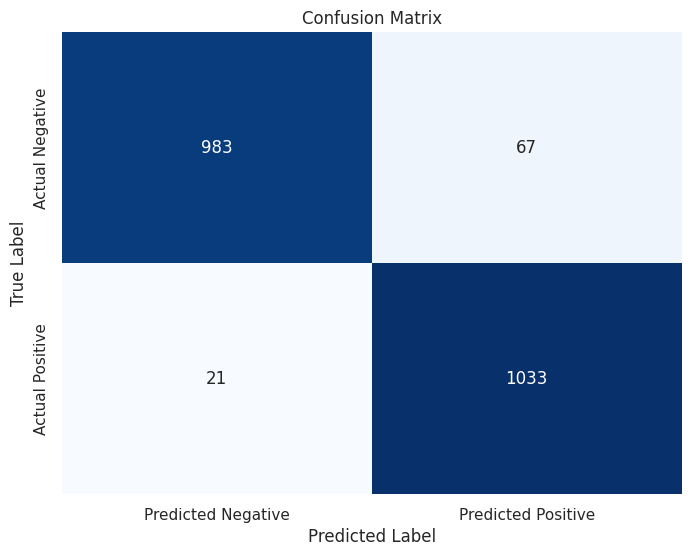

In [37]:
cm = confusion_matrix(ytest, ypred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
roc_auc = roc_auc_score(ytest, ypred_rf)
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 0.9581
